In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('./Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [27]:
 df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [29]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

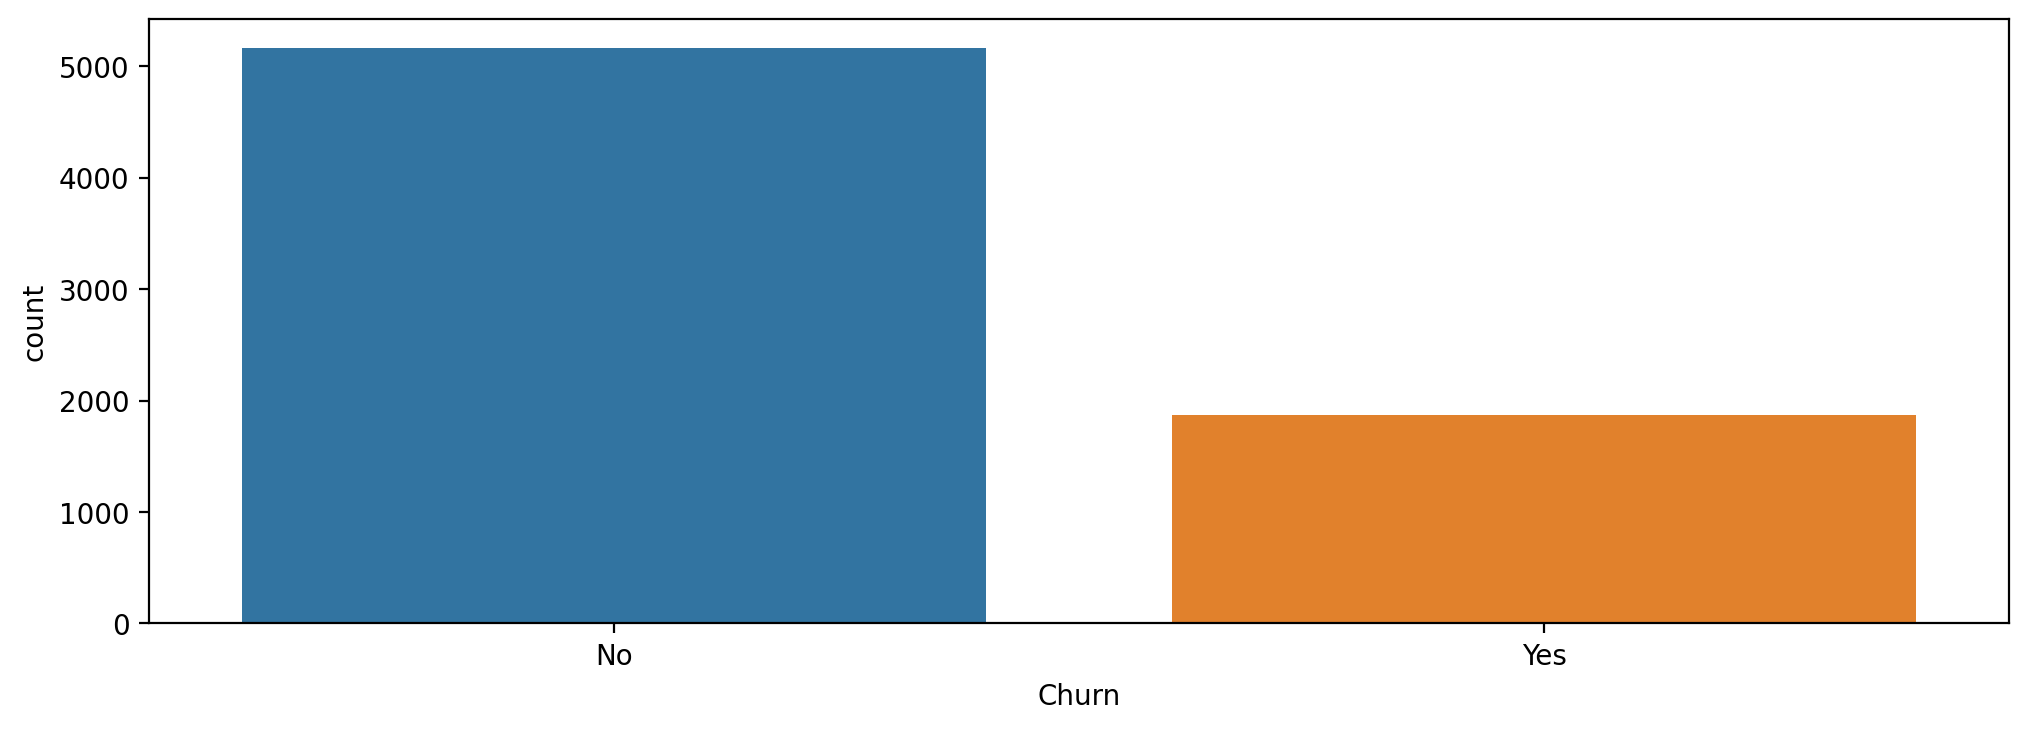

In [37]:
plt.figure(figsize=(12, 4), dpi=200)
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

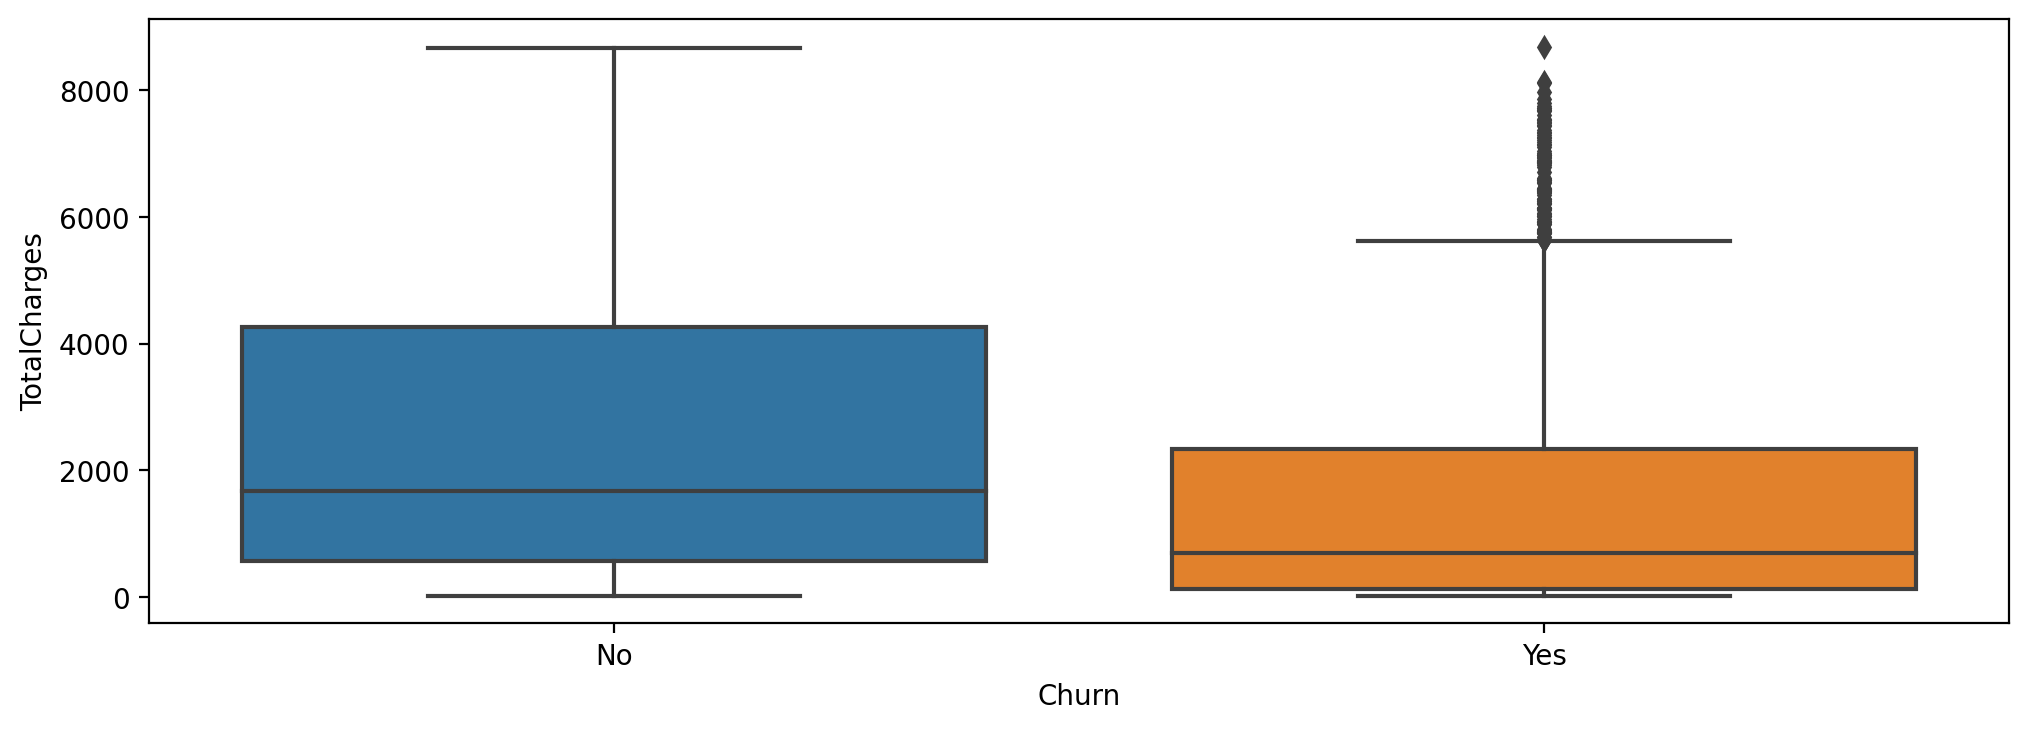

In [38]:
plt.figure(figsize=(12, 4), dpi=200)
sns.boxplot(data=df, x='Churn', y='TotalCharges')

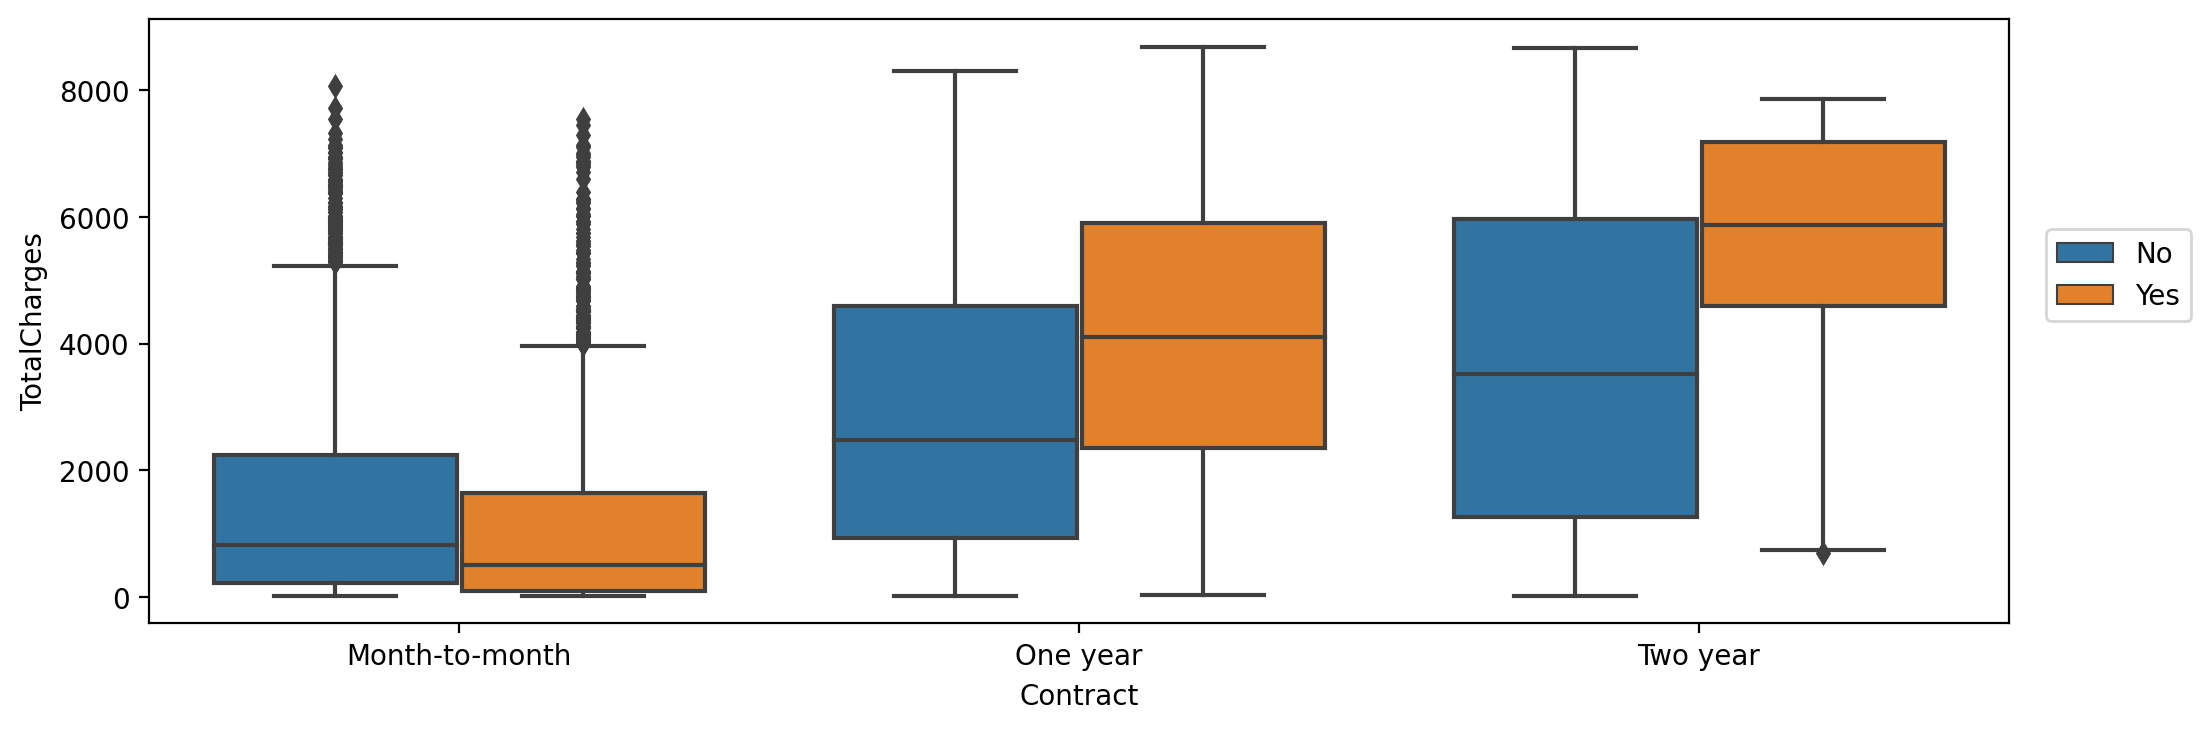

In [39]:
plt.figure(figsize=(12, 4), dpi=200)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn')
plt.legend(loc=(1.02, 0.5))

In [45]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [48]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]

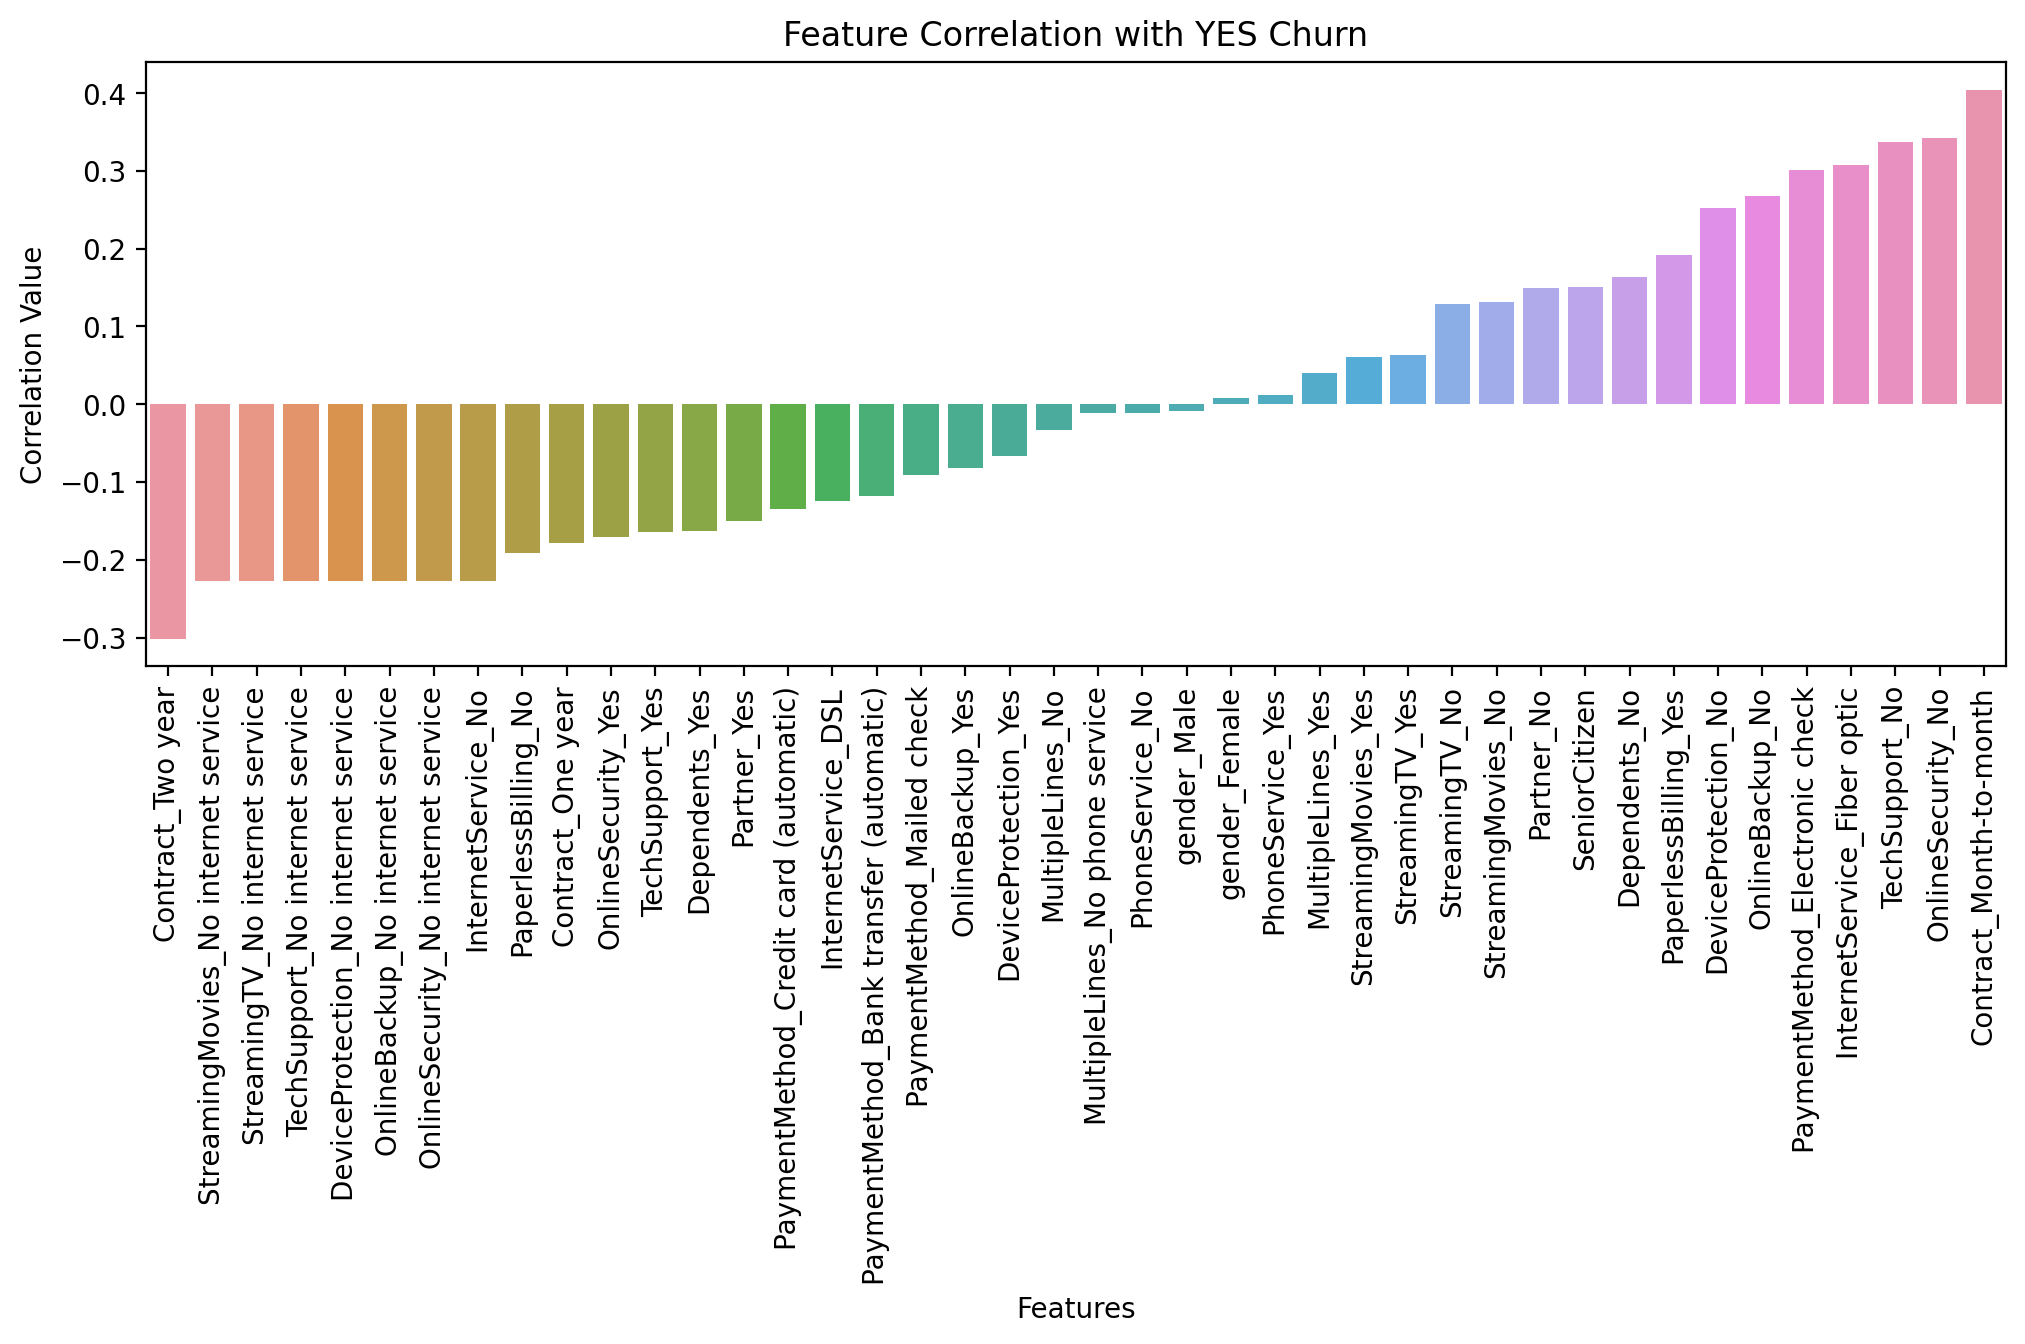

In [53]:
plt.figure(figsize=(12, 4), dpi=200)
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)

plt.title('Feature Correlation with YES Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.xticks(rotation=90);

# Churn Analysis

In [56]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [57]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

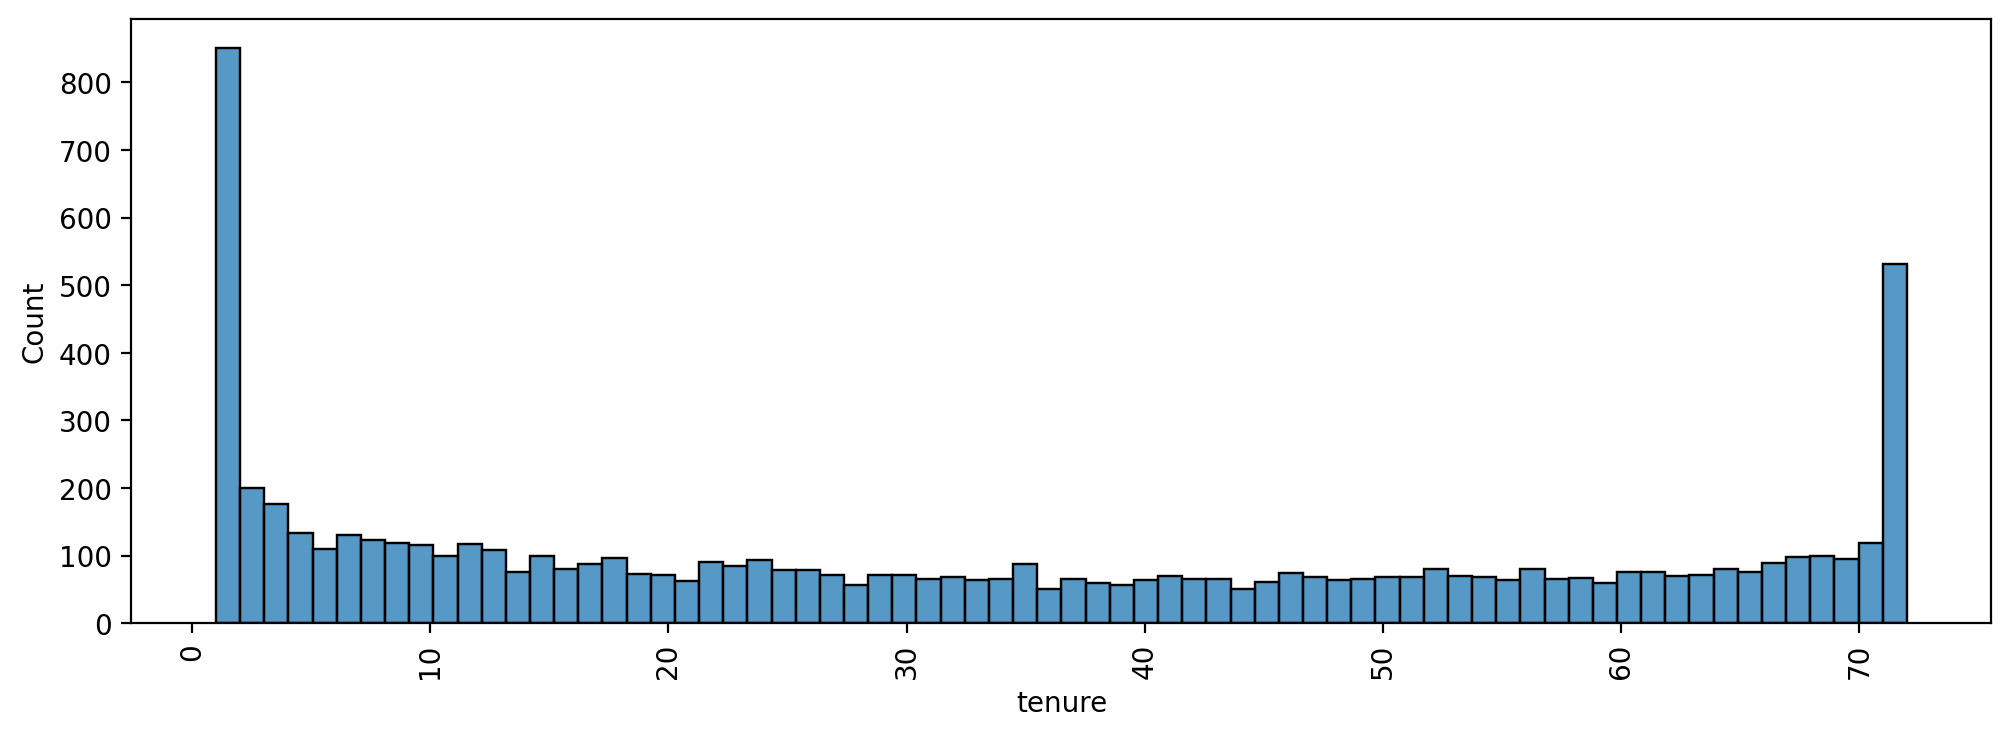

In [67]:
plt.figure(figsize=(12, 4), dpi=200)
sns.histplot(data=df, x='tenure', bins=70)

plt.xticks(rotation=90);

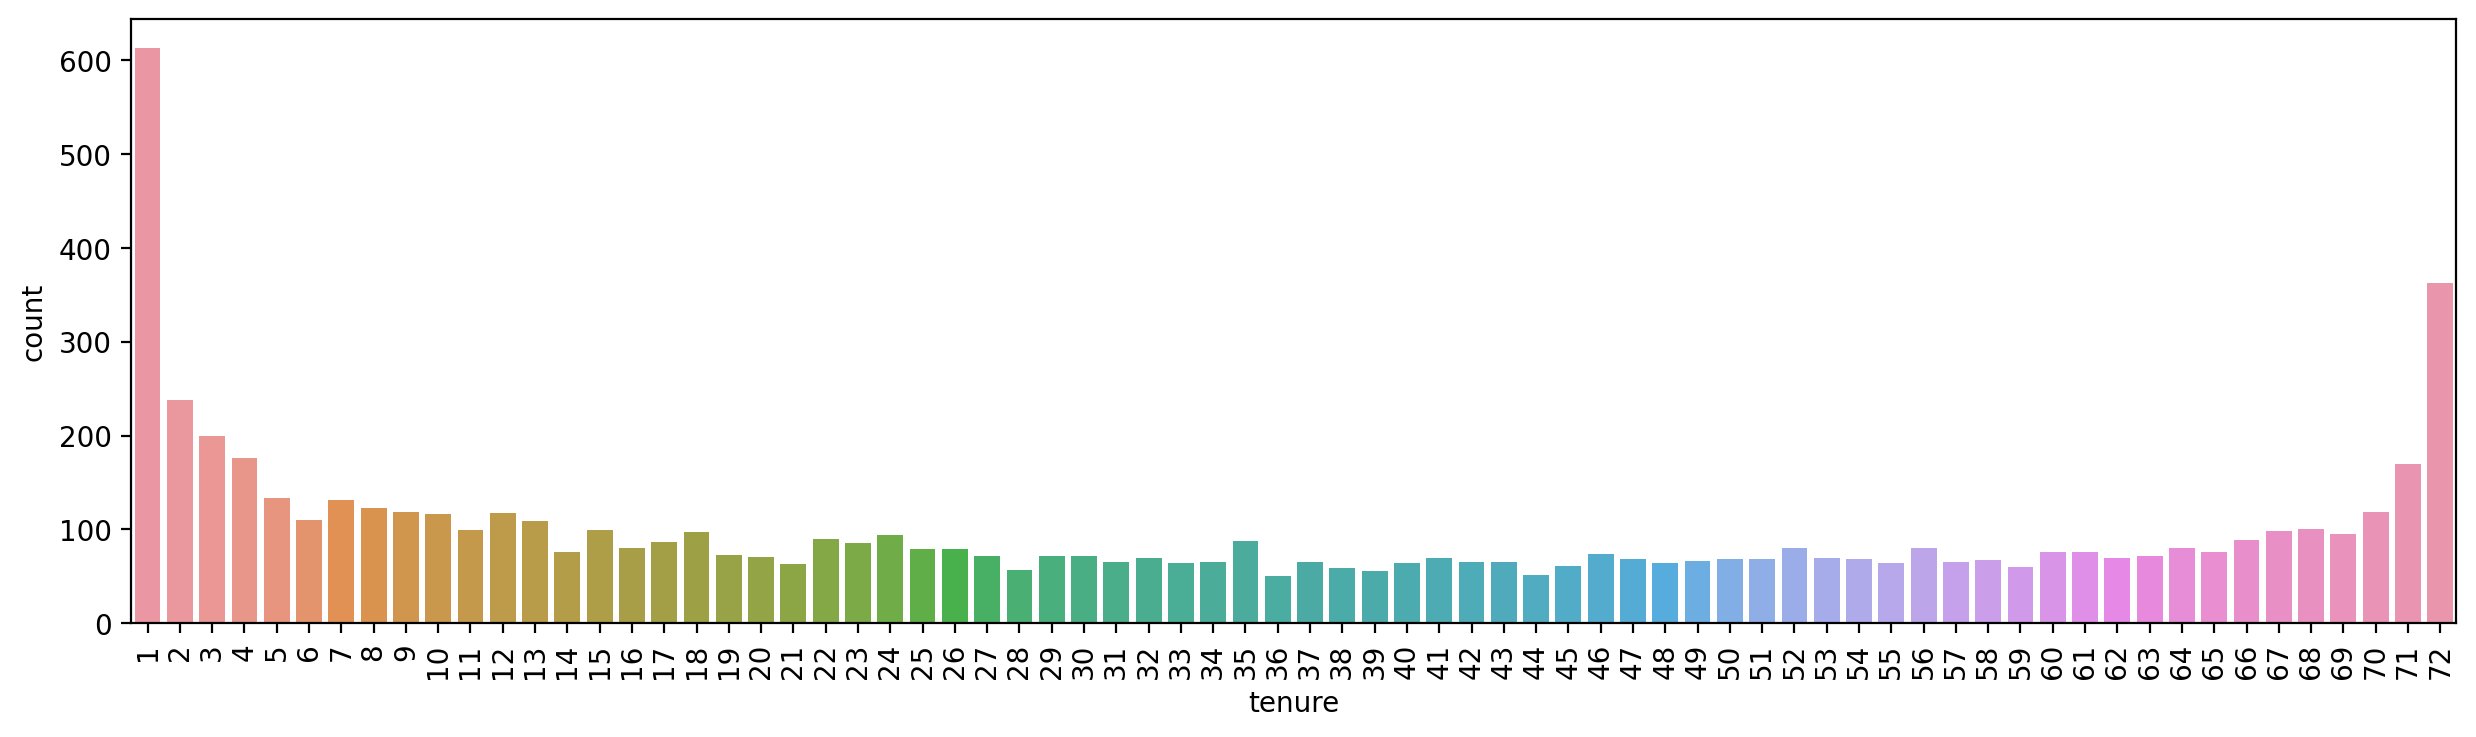

In [76]:
plt.figure(figsize=(15,4), dpi=200)
sns.countplot(data=df, x='tenure')

plt.xticks(rotation=90);

<Figure size 9000x2400 with 0 Axes>

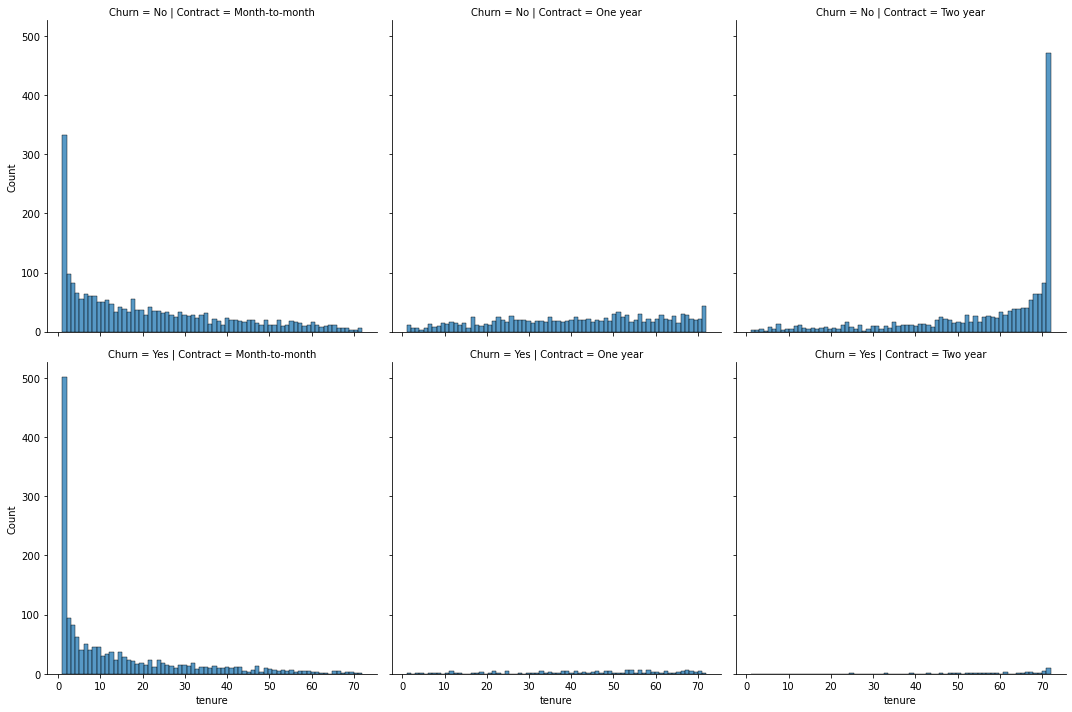

In [82]:
plt.figure(figsize=(30, 8), dpi=300)
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')

Basically, people on month-to-month contracts are much more likely to churn that people on yearly or 2-year contracts. So we need to find out why they are doing so

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

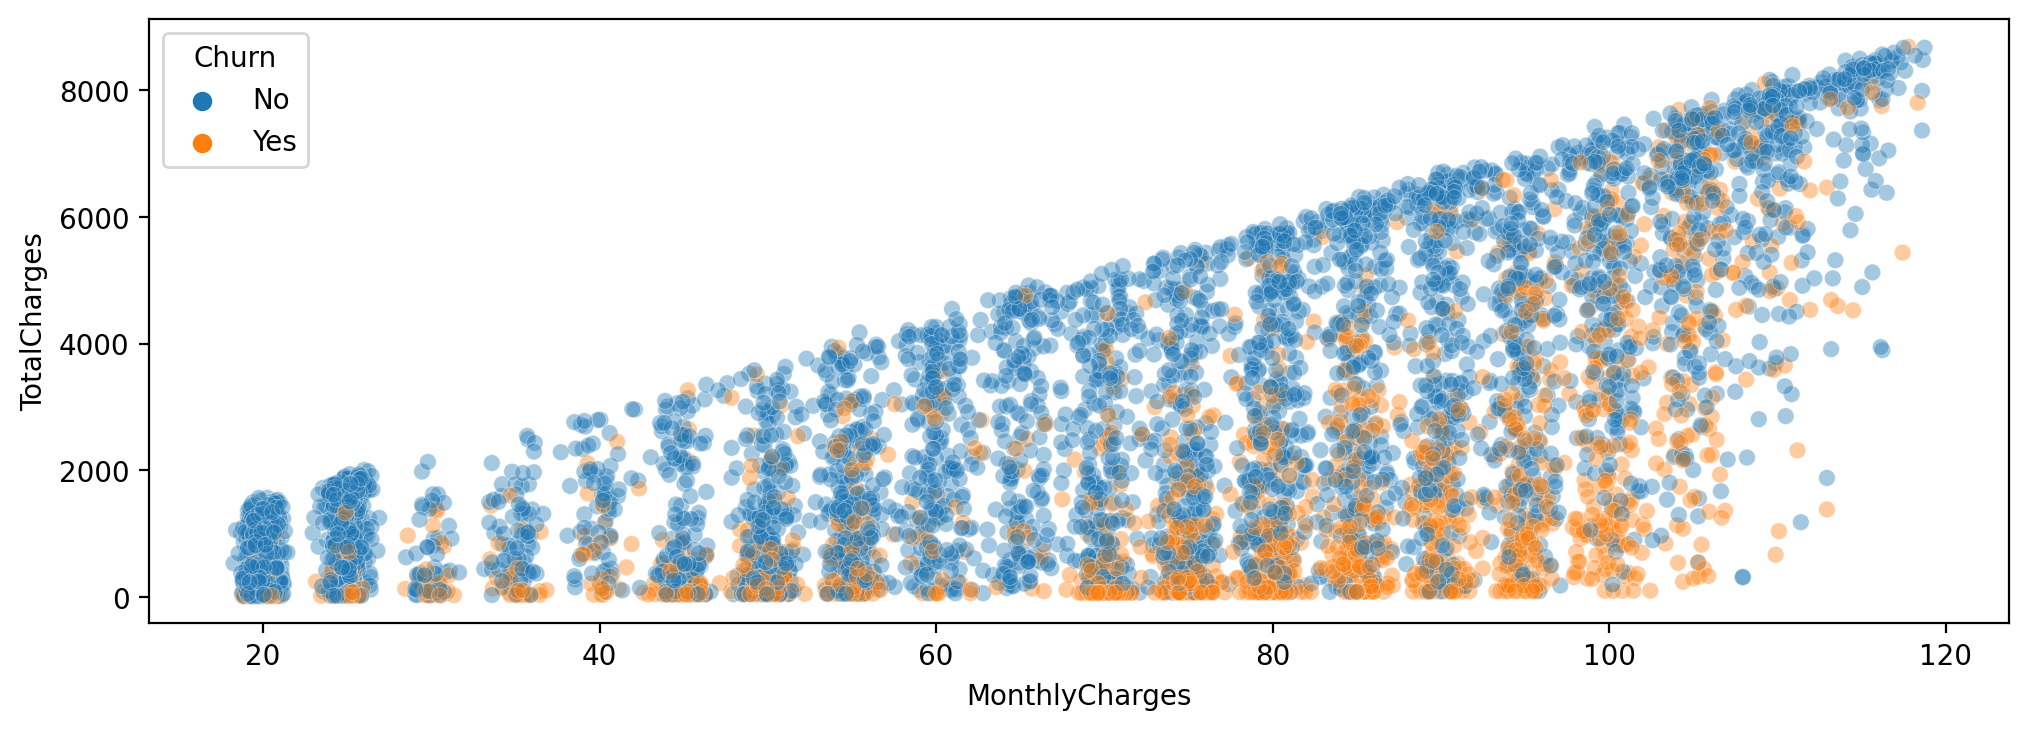

In [87]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df,y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.4, linewidth=0.3)

People with more monthly charges churn very early, meaning that people who are initially charged highly churn very soon
So we need to identify how to retain customers early on

In [127]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [128]:
yes_churn_percent = (yes_churn)/(yes_churn+no_churn)*100

In [129]:
churn_rate_series = yes_churn_percent.transpose()['customerID']
churn_rate_series

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='customerID'>

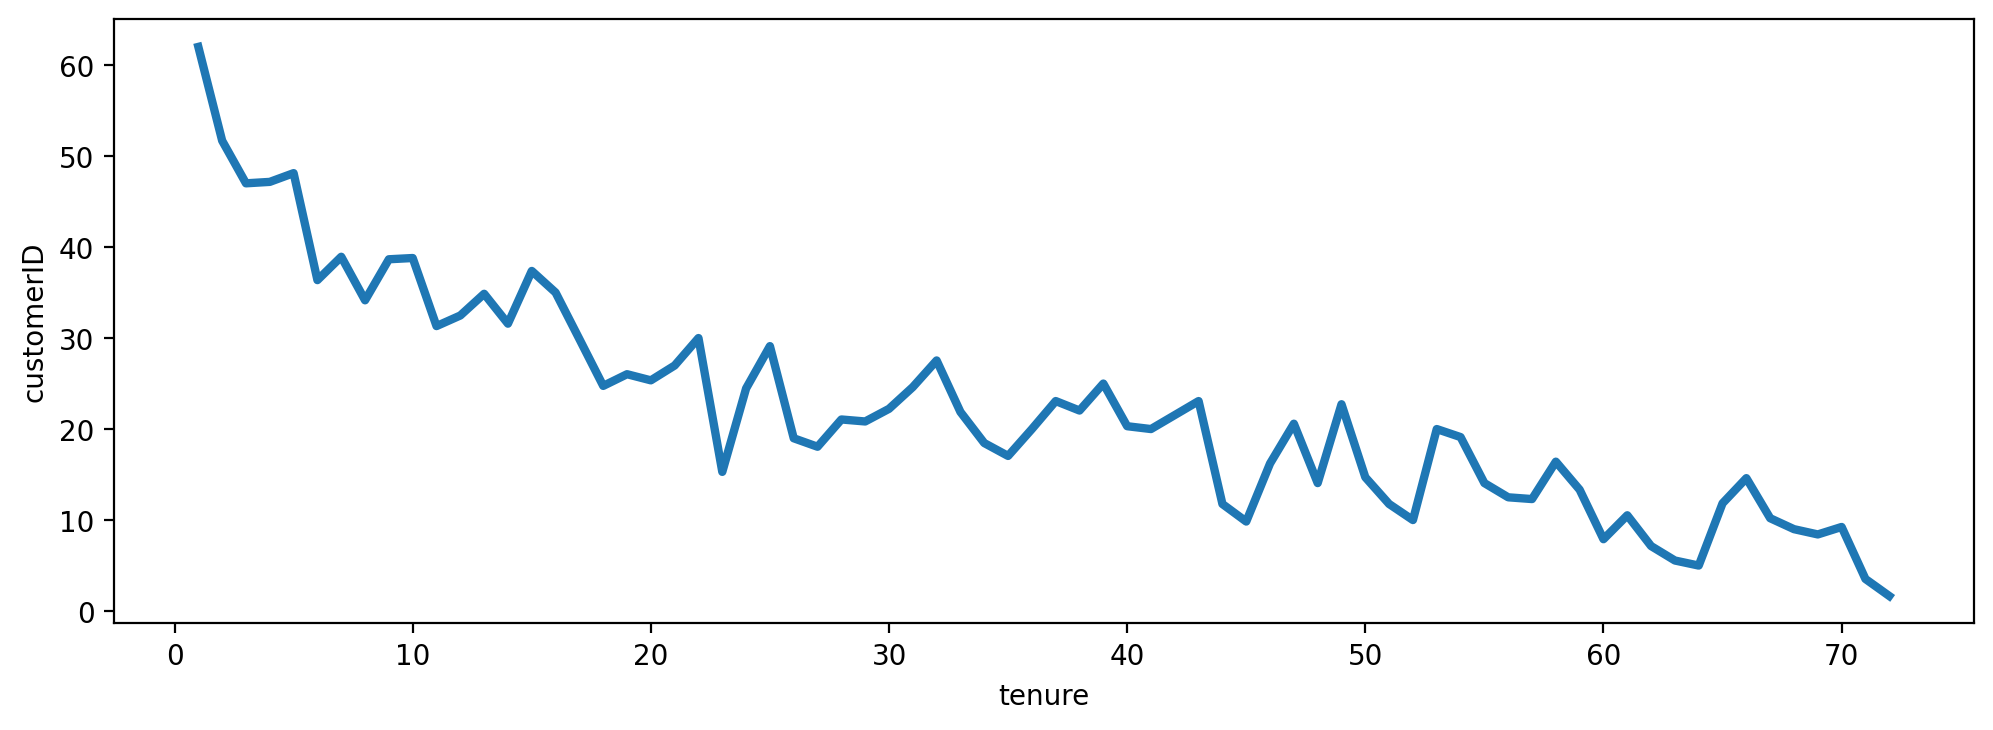

In [130]:
plt.figure(figsize=(12, 4), dpi=200)
sns.lineplot(data=churn_rate_series, palette='Blues', lw=3)

# Now let's create broader groups and then check the churn rates

In [131]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [136]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7027    24
7028    72
7029    11
7030     4
7031    66
Name: tenure, Length: 7032, dtype: int64

In [138]:
df['Tenure Cohort'] =  df['tenure'].apply(cohort)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

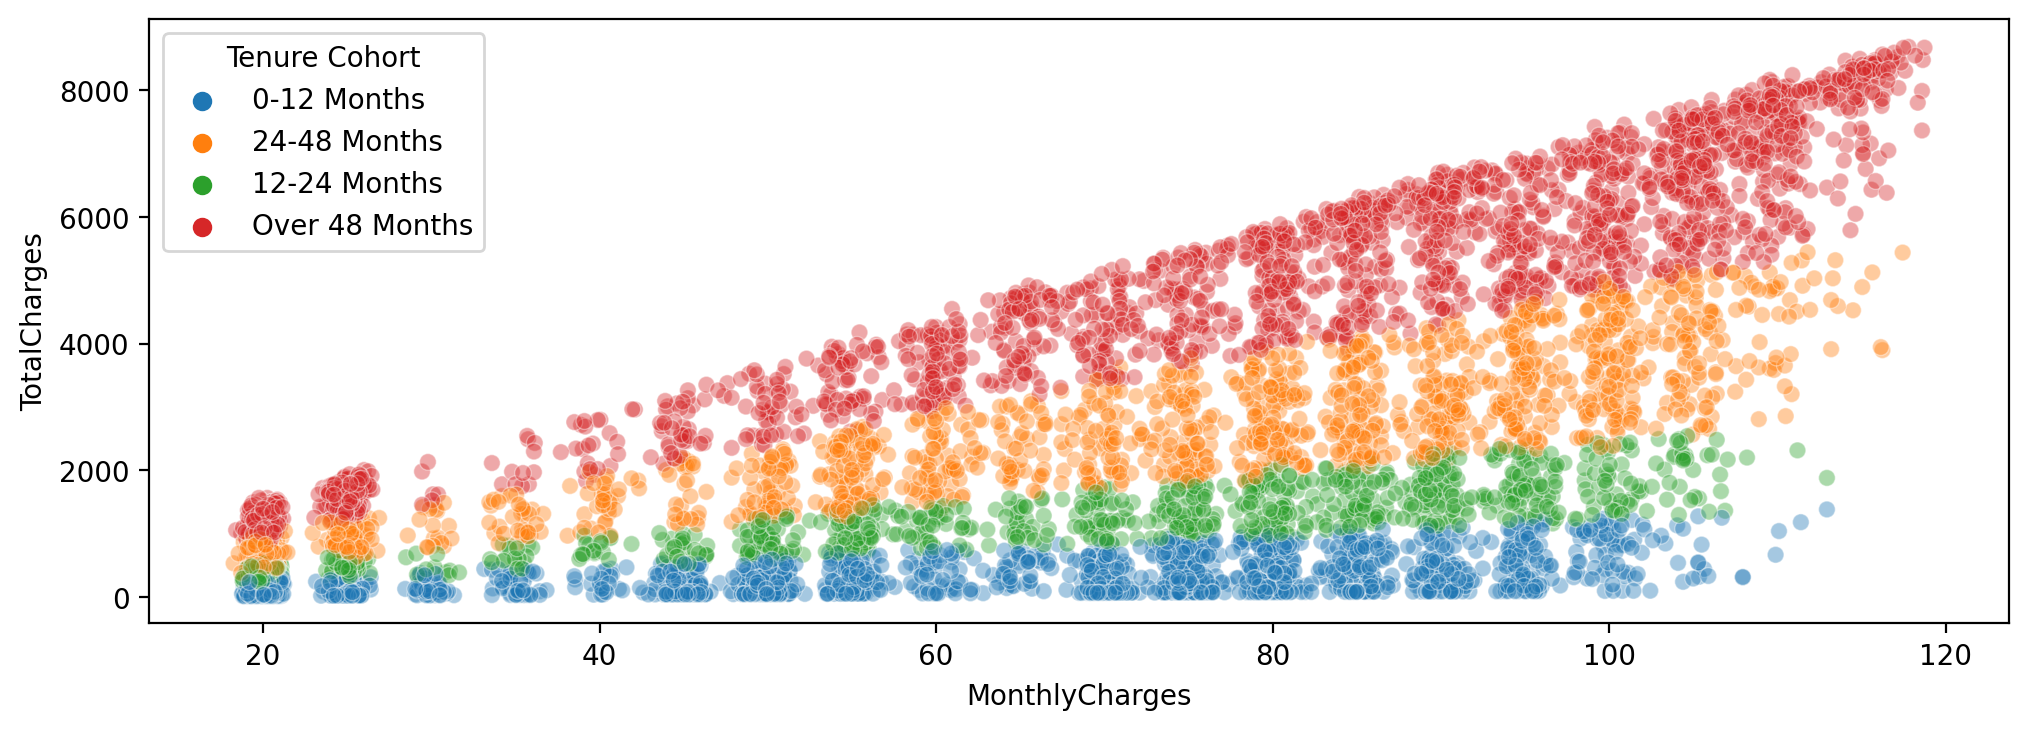

In [143]:
plt.figure(figsize=(12, 4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.4)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

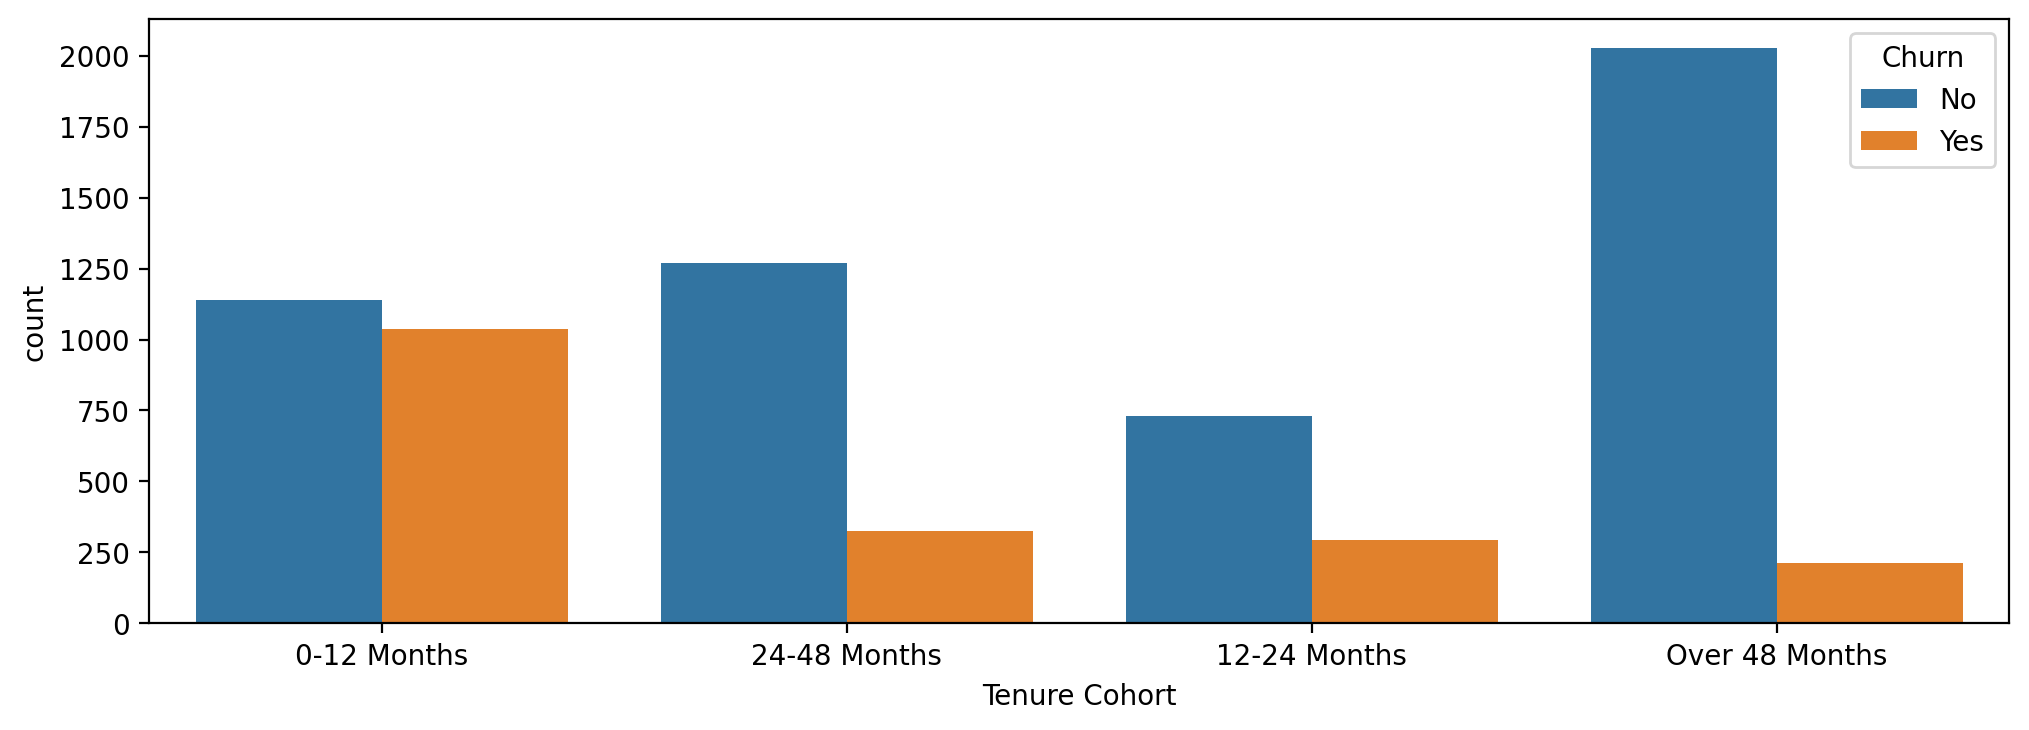

In [146]:
plt.figure(figsize=(12, 4), dpi=200)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

<Figure size 3000x1200 with 0 Axes>

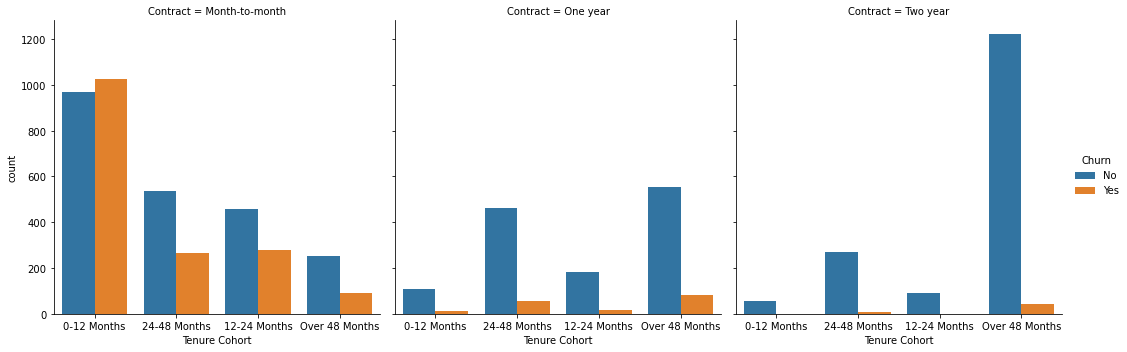

In [154]:
plt.figure(figsize=(15, 6), dpi=200)
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

# Now we will create models to predict the customer churn

In [158]:
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [159]:
y = df['Churn']

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [164]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [165]:
preds = dt.predict(X_test)

In [166]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



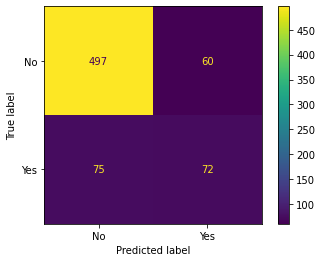

In [167]:
plot_confusion_matrix(dt, X_test, y_test)

In [177]:
imp_features = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feat Imp'])

In [180]:
imp_features.sort_values('Feat Imp')

,Feat Imp
DeviceProtection_No internet service,0.000000
Tenure Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000
DeviceProtection_Yes,0.000000


In [183]:
imp_features = imp_features[imp_features['Feat Imp']>0].sort_values('Feat Imp')

In [184]:
imp_features

,Feat Imp
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
StreamingMovies_No internet service,0.026290
Contract_Two year,0.027065


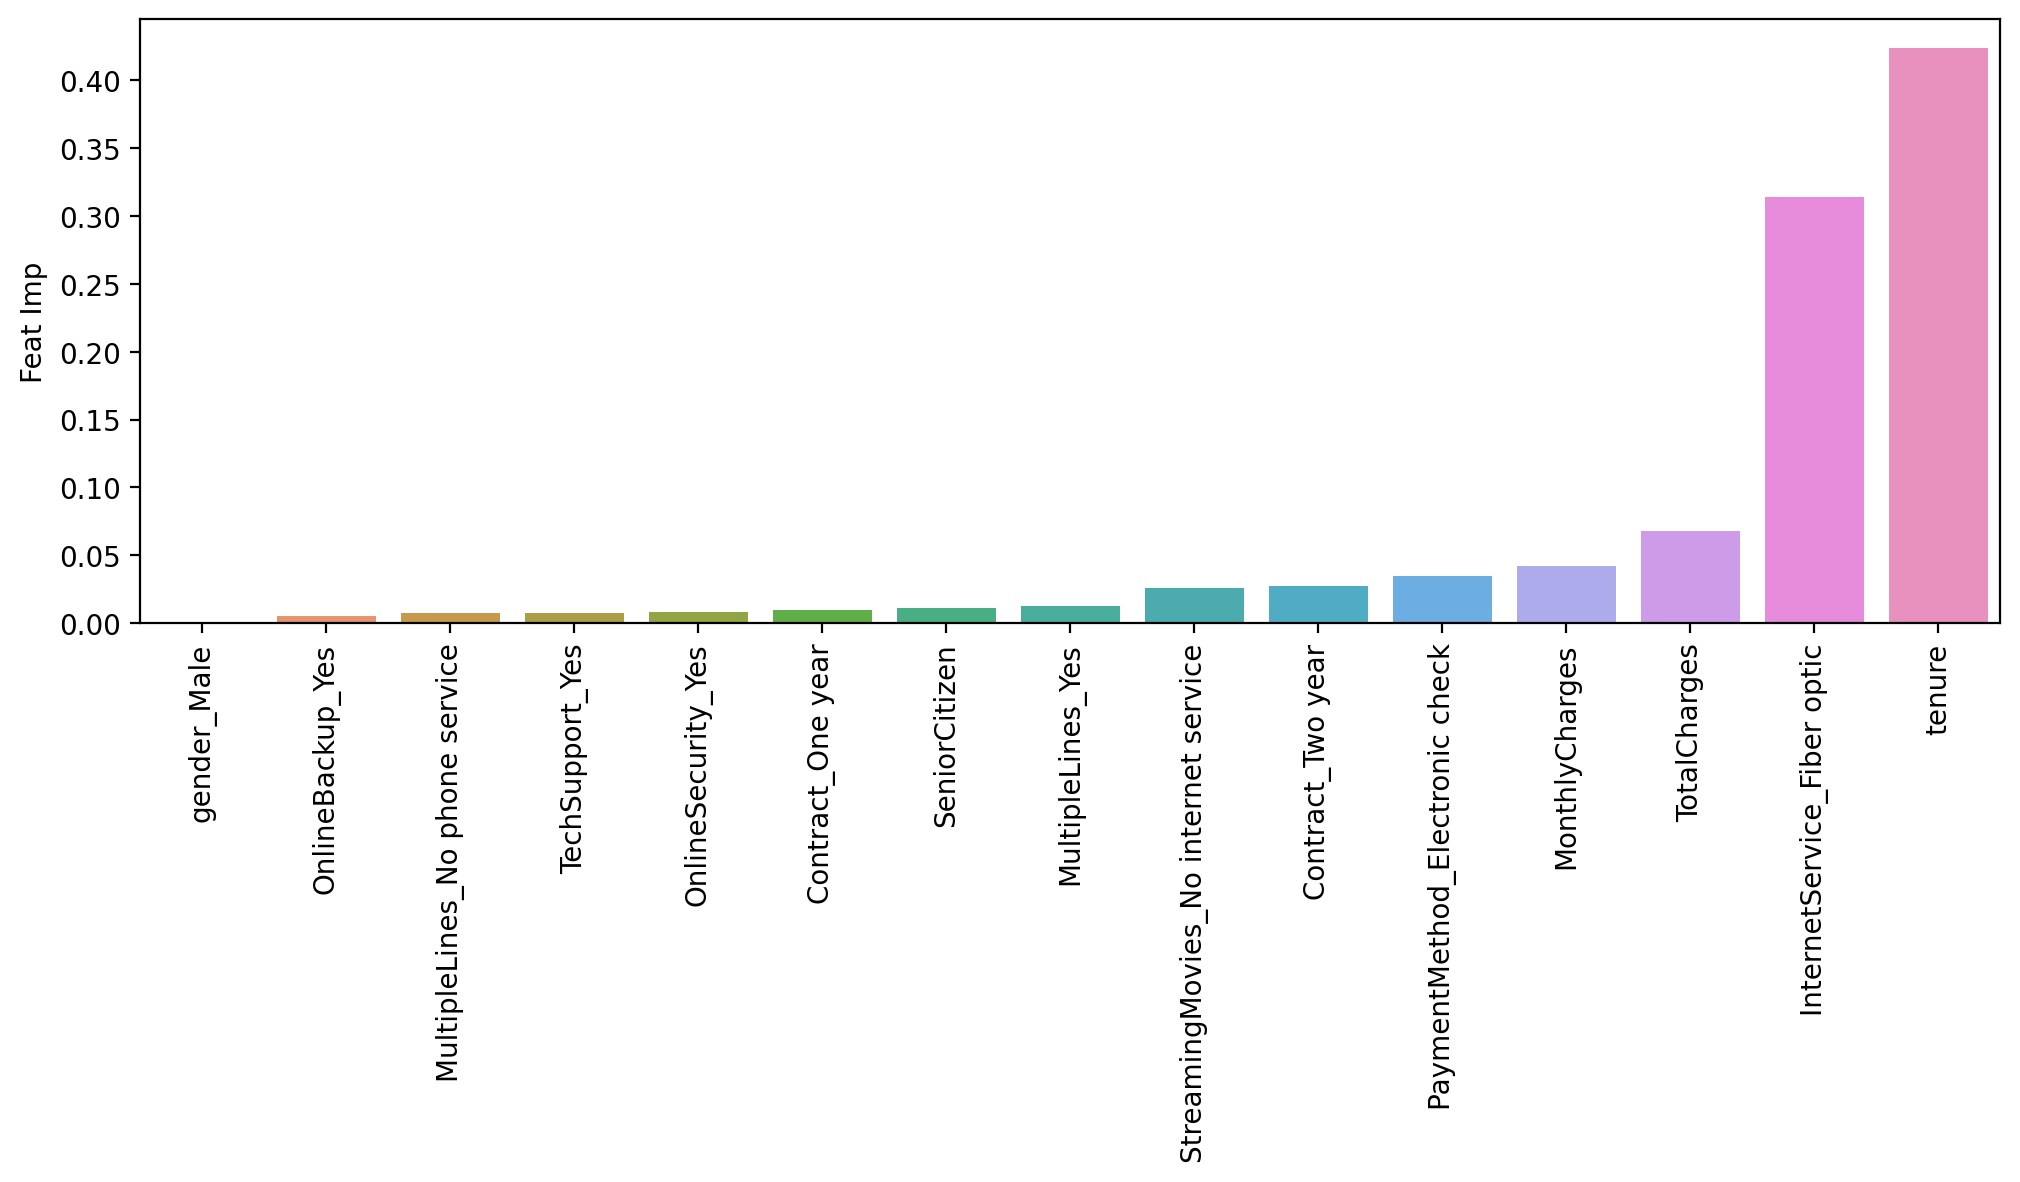

In [188]:
plt.figure(figsize=(12, 4), dpi=200)
sns.barplot(data=imp_features, x=imp_features.index,  y='Feat Imp')

plt.xticks(rotation=90);

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
rf = RandomForestClassifier(max_depth=6)
# set max depth to prevent overfitting

In [203]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [204]:
preds = rf.predict(X_test)

In [205]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.44      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



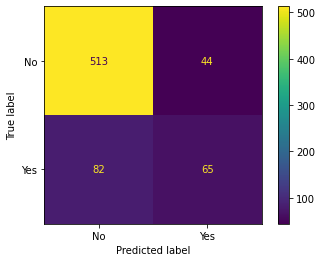

In [215]:
plot_confusion_matrix(rf, X_test, y_test) 

In [207]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [220]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [221]:
gb_model = GradientBoostingClassifier()

In [222]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [212]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [223]:
ada_preds = ada_model.predict(X_test)

In [214]:
gb_preds = gb_model.predict(X_test)

In [224]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [217]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



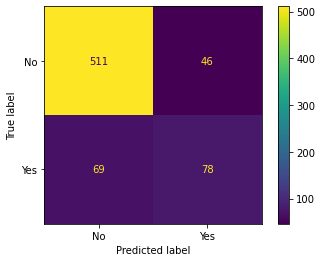

In [225]:
plot_confusion_matrix(ada_model, X_test, y_test) 

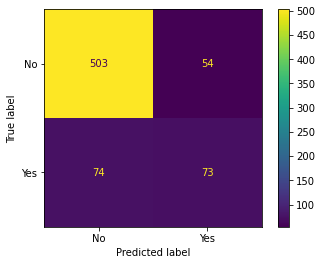

In [219]:
plot_confusion_matrix(gb_model, X_test, y_test) 